In [3]:
import xarray as xr
import numpy as np
import glob as glob
import functions
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [4]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/land_vars/'
ds_piClim = xr.open_dataset(rpath+'all_land_vars_piClim.nc')
ds_2xCO2 = xr.open_dataset(rpath+'all_land_vars_2xCO2.nc')
ds_4xCO2 = xr.open_dataset(rpath+'all_land_vars_4xCO2.nc')

In [5]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.snow.clm2.concatfiles.nc')
ds_2xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.snow.clm2.concatfiles.nc')
ds_4xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.snow.clm2.concatfiles.nc')

In [6]:
# Fix time stamp
ds_piClim_xtra = functions.fix_clm_time(ds_piClim_xtra)
ds_2xCO2_xtra = functions.fix_clm_time(ds_2xCO2_xtra)
ds_4xCO2_xtra = functions.fix_clm_time(ds_4xCO2_xtra)

In [7]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
ds_xtra_list = [ds_piClim_xtra, ds_2xCO2_xtra, ds_4xCO2_xtra]
for ds, ds_xtra in zip(ds_list, ds_xtra_list):
    ds['SNOW_FROM_ATM'] = ds_xtra['SNOW_FROM_ATM']

In [8]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
for ds in ds_list:
    ds['PRECIP_TOTAL'] = ds['SNOW_FROM_ATM']+ds['RAIN_FROM_ATM']

In [9]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.extra2.clm2.concatfiles.nc')
ds_2xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.extra2.clm2.concatfiles.nc')
ds_4xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.extra2.clm2.concatfiles.nc')

In [10]:
# Fix time stamp
ds_piClim_xtra = functions.fix_clm_time(ds_piClim_xtra)
ds_2xCO2_xtra = functions.fix_clm_time(ds_2xCO2_xtra)
ds_4xCO2_xtra = functions.fix_clm_time(ds_4xCO2_xtra)

In [11]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
ds_xtra_list = [ds_piClim_xtra, ds_2xCO2_xtra, ds_4xCO2_xtra]
for ds, ds_xtra in zip(ds_list, ds_xtra_list):
    ds['SNOW'] = ds_xtra['SNOW']
    ds['RAIN'] = ds_xtra['RAIN']
    ds['FSNO'] = ds_xtra['FSNO']
    ds['FSNO_EFF'] = ds_xtra['FSNO_EFF']
    ds['FSH_TO_COUPLER'] = ds_xtra['FSH_TO_COUPLER']
    ds['EFLX_LH_TOT'] = ds_xtra['EFLX_LH_TOT']

In [12]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
for ds in ds_list:
    ds['EF'] = ds['EFLX_LH_TOT']/(ds['EFLX_LH_TOT']+ds['FSH_TO_COUPLER'])

In [13]:
rpath = '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.evaptemp.clm2.concatfiles.nc')
ds_2xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.evaptemp.clm2.concatfiles.nc')
ds_4xCO2_xtra = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.evaptemp.clm2.concatfiles.nc')

In [14]:
# Fix time stamp
ds_piClim_xtra = functions.fix_clm_time(ds_piClim_xtra)
ds_2xCO2_xtra = functions.fix_clm_time(ds_2xCO2_xtra)
ds_4xCO2_xtra = functions.fix_clm_time(ds_4xCO2_xtra)

In [15]:
# Create new variables
ds_list = [ds_piClim, ds_2xCO2, ds_4xCO2]
ds_xtra_list = [ds_piClim_xtra, ds_2xCO2_xtra, ds_4xCO2_xtra]
for ds, ds_xtra in zip(ds_list, ds_xtra_list):
    ds['TSA'] = ds_xtra['TSA']

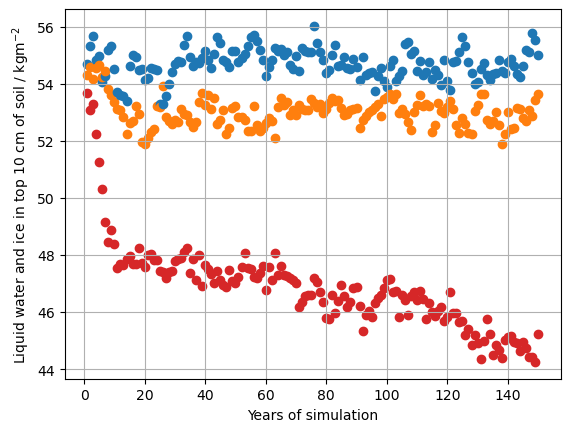

In [5]:
# Make a spatial average
Arctic_lim = 60
var = 'SOILWATER_10CM'
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
piClim_Arctic = ds_piClim[var].sel(lat=slice(Arctic_lim,90))
Arctic_2xCO2 = ds_2xCO2[var].sel(lat=slice(Arctic_lim,90))
Arctic_4xCO2 = ds_4xCO2[var].sel(lat=slice(Arctic_lim,90))

annual_piClim = piClim_Arctic.groupby('time.year').mean('time')
annual_2xCO2 = Arctic_2xCO2.groupby('time.year').mean('time')
annual_4xCO2 = Arctic_4xCO2.groupby('time.year').mean('time')

import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (annual_piClim.isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (annual_2xCO2.isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (annual_4xCO2.isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Liquid water and ice in top 10 cm of soil / kgm$^{-2}$')
plt.show()

In [12]:
# Make a spatial average
Arctic_lim = 60
var = 'EF'
season = 'JJA'

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90))
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90))
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90))


# Seasonal averages
ds_piClim_season = ds_piClim_i.sel(time=ds_piClim_i.time.dt.season==season)
ds_piClim_i = ds_piClim_season.groupby(ds_piClim_season.time.dt.year).mean('time')

ds_2xCO2_season = ds_2xCO2_i.sel(time=ds_2xCO2_i.time.dt.season==season)
ds_2xCO2_i = ds_2xCO2_season.groupby(ds_2xCO2_season.time.dt.year).mean('time')

ds_4xCO2_season = ds_4xCO2_i.sel(time=ds_4xCO2_i.time.dt.season==season)
ds_4xCO2_i = ds_4xCO2_season.groupby(ds_4xCO2_season.time.dt.year).mean('time')

import matplotlib.pyplot as plt
for i in range(len(annual_piClim.year)):
    plt.scatter(1+i, (ds_piClim_i[var].isel(year=i)*area_weights).sum(), color='tab:blue')
    plt.scatter(1+i, (ds_2xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:orange')
    plt.scatter(1+i, (ds_4xCO2_i[var].isel(year=i)*area_weights).sum(), color='tab:red')
plt.grid()
plt.xlabel('Years of simulation')
plt.ylabel('Liquid water and ice in top 10 cm of soil / kgm$^{-2}$')
plt.show()

NameError: name 'annual_piClim' is not defined

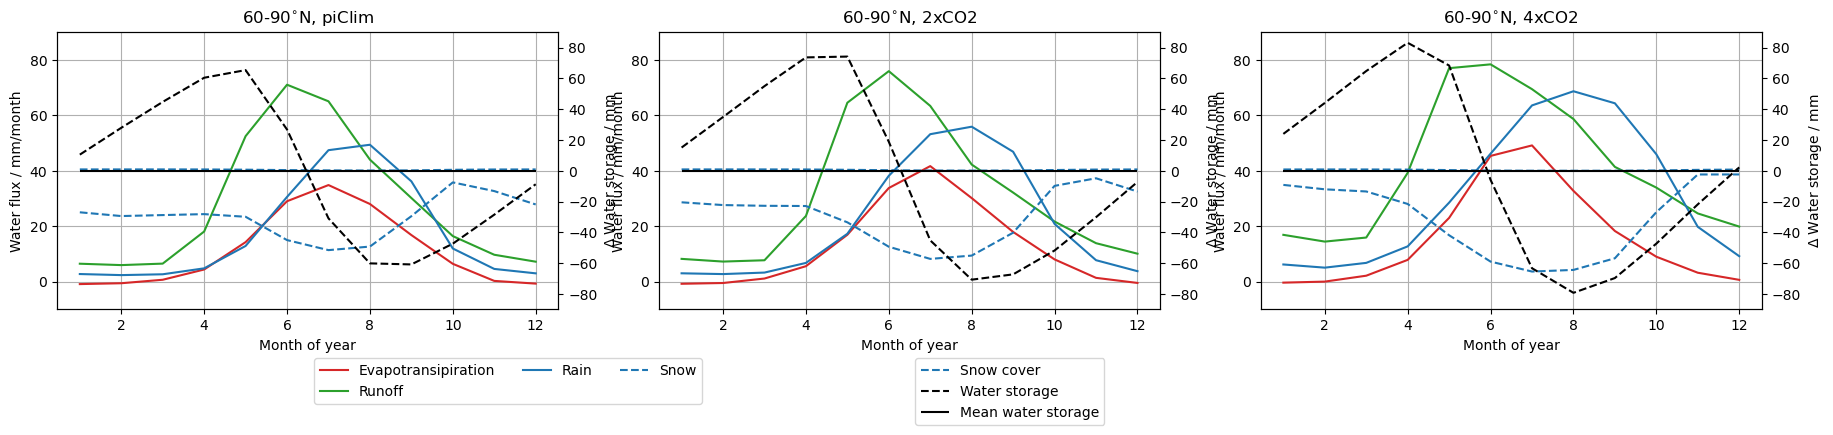

In [ ]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2069-12-31')

# Choose area
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), time=tslice)


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,4])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()
    ax3 = ax.twinx()
    ax.plot(ds.month, (ds['QFLX_EVAP_TOT']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Evapotransipiration',color='tab:red')
    ax.plot(ds.month, (ds['QRUNOFF']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Runoff', color='tab:green')
    #ax.plot(ds.month, (ds['PRECIP_TOTAL']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Precipitation',color='tab:blue')   
    ax.plot(ds.month, (ds['RAIN']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Rain',color='tab:blue')   
    ax.plot(ds.month, (ds['SNOW']*area_weights).sum(dim=['lon','lat'])*60*60*24*30, label='Snow',color='tab:blue', linestyle='--')       
    ax2.plot(ds.month, (ds['FSNO']*area_weights).sum(dim=['lon','lat']), label='Snow cover',color='tab:blue', linestyle='--')       
    ax2.plot(ds.month, (ds['TWS']*area_weights).sum(dim=['lon','lat'])-(ds['TWS']*area_weights).sum(dim=['lon','lat']).mean('month'), label='Water storage', linestyle='--',color='black')
    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-10,90])
    ax2.set_ylim([-90,90])
    ax2.set_ylabel('$\Delta$ Water storage / mm')
    ax2.hlines(0, 1, 12, color='black', label='Mean water storage')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)
plt.show()

In [16]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2069-12-31')

# Choose area
lons = slice(0,300)
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90),lon=lons)/(ds_piClim['area'].sel(lat=slice(Arctic_lim,90),lon=lons).sum())
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), lon=lons, time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), lon=lons, time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), lon=lons, time=tslice)
#ds_test = ds_4xCO2.sel(lat=slice(20,30), time=tslice)
#area_weights_test = ds_piClim['area'].sel(lat=slice(20,30))/(ds_piClim['area'].sel(lat=slice(20,30)).sum())


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')
#ds_test = ds_test.groupby(ds_test.time.dt.month).mean('time')

In [17]:
ds_piClim_i['TOTAL_WATER_LOSS'] = ds_piClim_i['QFLX_EVAP_TOT'] + ds_piClim_i['QRUNOFF']
ds_2xCO2_i['TOTAL_WATER_LOSS'] = ds_2xCO2_i['QFLX_EVAP_TOT'] + ds_2xCO2_i['QRUNOFF']
ds_4xCO2_i['TOTAL_WATER_LOSS'] = ds_4xCO2_i['QFLX_EVAP_TOT'] + ds_4xCO2_i['QRUNOFF']

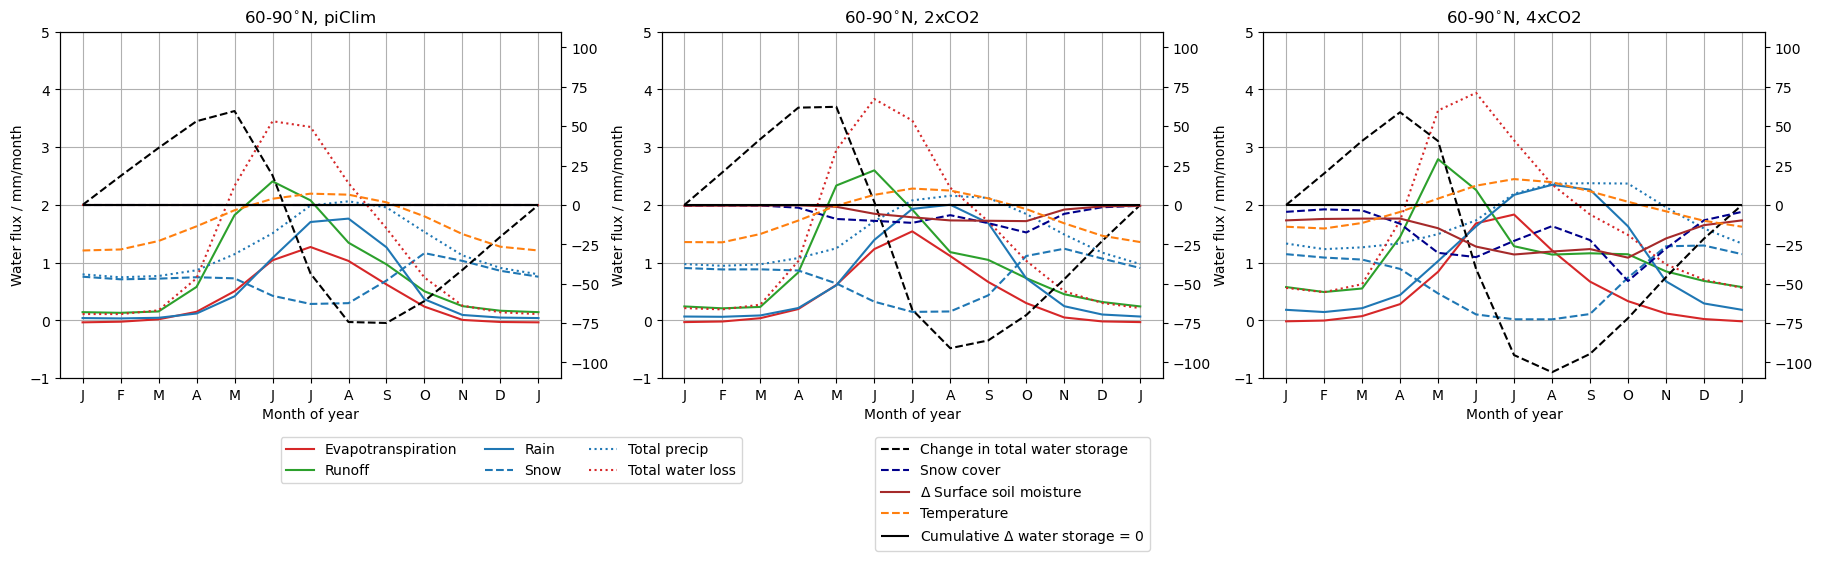

In [54]:
months = np.arange(1, 14, 1)
monthnames = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J']
month_lengths = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,5])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()

    # For flux variables
    for var, l, c, ls in zip(['QFLX_EVAP_TOT', 'QRUNOFF', 'RAIN', 'SNOW', 'PRECIP_TOTAL','TOTAL_WATER_LOSS'], ['Evapotranspiration', 'Runoff', 'Rain', 'Snow', 'Total precip','Total water loss'], ['tab:red', 'tab:green', 'tab:blue', 'tab:blue','tab:blue','tab:red'], ['-','-','-','--',':',':']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*60*60*24#*month_lengths
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    # For delta variables
    for var, l, c, ls in zip(['TWS'], ['Change in total water storage'], ['k'], ['--']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        deltas = [0]
        cums = [0]
        for i in range(1,13):
            deltas.append(avg_plus_J[i]-avg_plus_J[i-1])
            cums.append(cums[i-1]+(avg_plus_J[i]-avg_plus_J[i-1]))
        #ax2.plot(months, deltas, label=l, color=c, linestyle=ls)
        ax2.plot(months, cums, label=l, color=c, linestyle=ls)

    # For fraction variables
    for var, l, c, ls in zip(['FSNO'], ['Snow cover'], ['darkblue'], ['--']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*100 - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        #avg = ((ds[var]*area_weights).sum(dim=['lon','lat']) - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat']))/(ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    # Soil moisture
    for var, l, c, ls in zip(['SOILWATER_10CM'], ['$\Delta$ Surface soil moisture'], ['brown'], ['-']):
        avg = ((ds[var]*area_weights).sum(dim=['lon','lat']) - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat']))/(ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    # Temperature
    for var, l, c, ls in zip(['TSA'], ['Temperature'], ['tab:orange'], ['--']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat']) - 273.15
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)



    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_xticks(months)
    ax.set_xticklabels(monthnames)
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-1,5])
    ax2.set_ylim([-110,110])
    #ax2.set_ylabel('$\Delta$ Water storage / mm')
    ax2.hlines(0, 1, 13, color='black', label='Cumulative $\Delta$ water storage = 0')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# For fraction variables
#for var, l, c, ls in zip(['SOILWATER_10CM'], ['Surface soil moisture sahara?'], ['brown'], ['-']):
#    avg = (ds_test[var]*area_weights_test).sum(dim=['lon','lat'])
#    avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
#    ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)
plt.show()

In [24]:
# Make a spatial average
Arctic_lim = 60
tslice = slice('2040-01-01','2069-12-31')

# Choose area
lons = slice(0,300)
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90),lon=lons)/(ds_piClim['area'].sel(lat=slice(Arctic_lim,90),lon=lons).sum())
ds_piClim_i = ds_piClim.sel(lat=slice(Arctic_lim,90), lon=lons, time=tslice)
ds_2xCO2_i = ds_2xCO2.sel(lat=slice(Arctic_lim,90), lon=lons, time=tslice)
ds_4xCO2_i = ds_4xCO2.sel(lat=slice(Arctic_lim,90), lon=lons, time=tslice)
#ds_test = ds_4xCO2.sel(lat=slice(20,30), time=tslice)
#area_weights_test = ds_piClim['area'].sel(lat=slice(20,30))/(ds_piClim['area'].sel(lat=slice(20,30)).sum())


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_2xCO2_i = ds_2xCO2_i.groupby(ds_2xCO2_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')
#ds_test = ds_test.groupby(ds_test.time.dt.month).mean('time')


rpath= '/nird/datapeak/NS9600K/astridbg/arctic-cld-feedbacks/data/other_cloud_vars/'

landmask = xr.open_dataarray(rpath+'LANDFRAC_piClim.nc')
landmask = landmask.isel(time=0)
oceanmask = 1-landmask

ds_piClim_RH = xr.open_dataset(rpath+'RELHUM_piClim.nc')
ds_2xCO2_RH = xr.open_dataset(rpath+'RELHUM_abrupt-2xCO2.nc')
ds_4xCO2_RH = xr.open_dataset(rpath+'RELHUM_abrupt-4xCO2.nc')
lev = ds_piClim_RH.lev[-1]
var = 'RELHUM'
tslice = slice('2040-01-01', '2069-12-31')

ds_piClim_RH = ds_piClim_RH.sel(lev=lev, time=tslice)
ds_2xCO2_RH = ds_2xCO2_RH.sel(lev=lev, time=tslice)
ds_4xCO2_RH = ds_4xCO2_RH.sel(lev=lev, time=tslice)

piClim_m = ds_piClim_RH.groupby(ds_piClim_RH.time.dt.month).mean('time')
ds_2xCO2_m = ds_2xCO2_RH.groupby(ds_2xCO2_RH.time.dt.month).mean('time')
ds_4xCO2_m = ds_4xCO2_RH.groupby(ds_4xCO2_RH.time.dt.month).mean('time')

piClim_RH_lnd = functions.computeWeightedMeanMasked(piClim_m.sel(lat=slice(Arctic_lim, 90), lon=lons), landmask.sel(lat=slice(Arctic_lim,90), lon=lons))
ds_2xCO2_RH_lnd = functions.computeWeightedMeanMasked(ds_2xCO2_m.sel(lat=slice(Arctic_lim, 90),lon=lons), landmask.sel(lat=slice(Arctic_lim,90), lon=lons))
ds_4xCO2_RH_lnd = functions.computeWeightedMeanMasked(ds_4xCO2_m.sel(lat=slice(Arctic_lim, 90), lon=lons), landmask.sel(lat=slice(Arctic_lim,90), lon=lons))

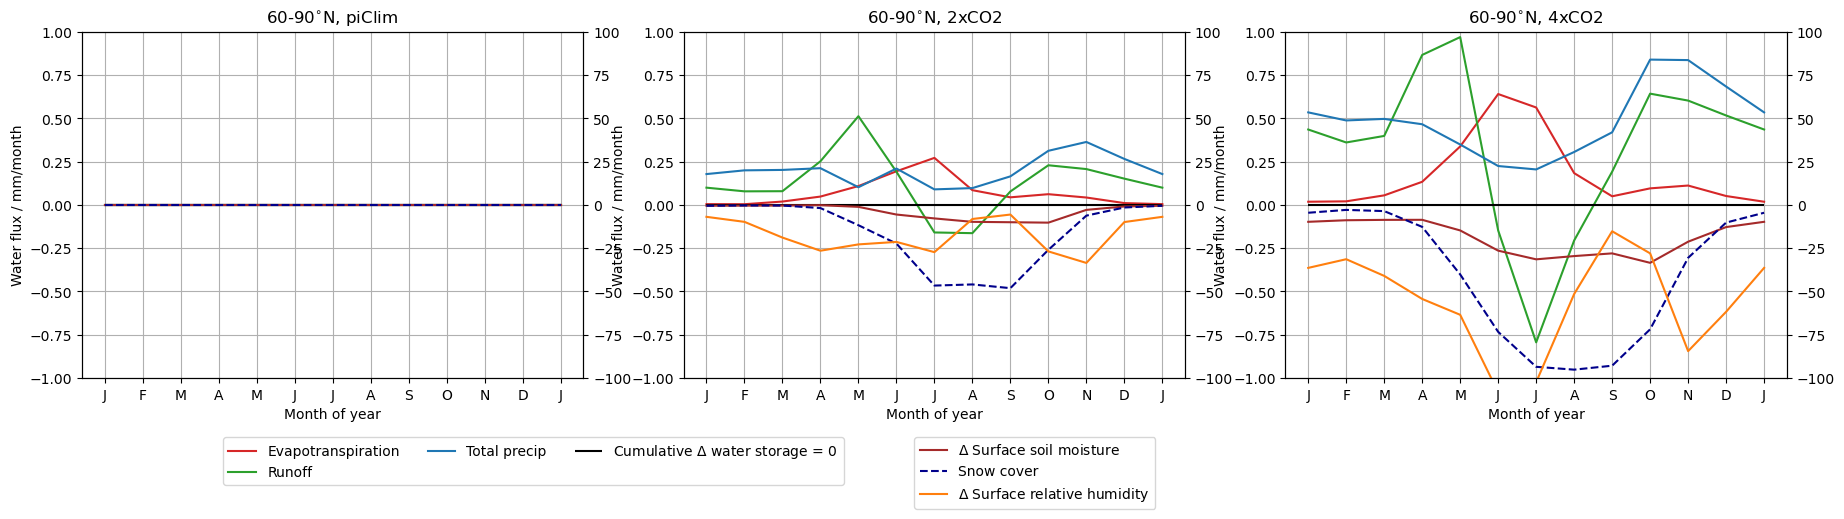

In [26]:
months = np.arange(1, 14, 1)
monthnames = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J']
month_lengths = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])

ds_list = [ds_piClim_i, ds_2xCO2_i, ds_4xCO2_i]
name_list = ['piClim', '2xCO2', '4xCO2']

fig, axes = plt.subplots(1, 3, figsize=[22,5])
for ax, ds, name in zip(axes.flatten(), ds_list, name_list):
    ax2 = ax.twinx()

    # For flux variables
    for var, l, c, ls in zip(['QFLX_EVAP_TOT', 'QRUNOFF','PRECIP_TOTAL'], ['Evapotranspiration','Runoff','Total precip'], ['tab:red', 'tab:green','tab:blue'], ['-','-','-']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*60*60*24#*month_lengths
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*60*60*24 - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*60*60*24
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

     # Soil moisture
    for var, l, c, ls in zip(['SOILWATER_10CM'], ['$\Delta$ Surface soil moisture'], ['brown'], ['-']):
        avg = ((ds[var]*area_weights).sum(dim=['lon','lat']) - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat']))/(ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    
    # For fraction variables
    for var, l, c, ls in zip(['FSNO'], ['Snow cover'], ['darkblue'], ['--']):
        #avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*100 - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg = ((ds[var]*area_weights).sum(dim=['lon','lat']) - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat']))/(ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    # Surface relative humidity
    if name == '2xCO2':
        for var, l, c, ls in zip(['RELHUM'], ['$\Delta$ Surface relative humidity'], ['tab:orange'], ['-']):
            avg = (ds_2xCO2_RH_lnd[var] - piClim_RH_lnd[var])*10
            avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
            ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    elif name == '4xCO2':
        for var, l, c, ls in zip(['RELHUM'], ['$\Delta$ Surface relative humidity'], ['tab:orange'], ['-']):
            avg = (ds_4xCO2_RH_lnd[var] - piClim_RH_lnd[var])*10
            avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
            ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    """
    for var, l, c, ls in zip(['QFLX_EVAP_TOT', 'QRUNOFF', 'RAIN', 'SNOW', 'PRECIP_TOTAL','TOTAL_WATER_LOSS'], ['Evapotranspiration', 'Runoff', 'Rain', 'Snow', 'Total precip','Total water loss'], ['tab:red', 'tab:green', 'tab:blue', 'tab:blue','tab:blue','tab:red'], ['-','-','-','--',':',':']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*60*60*24#*month_lengths
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*60*60*24 - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*60*60*24
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    
    # For delta variables
    for var, l, c, ls in zip(['TWS'], ['Change in total water storage'], ['k'], ['--']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        deltas = [0]
        cums = [0]
        for i in range(1,13):
            deltas.append(avg_plus_J[i]-avg_plus_J[i-1])
            cums.append(cums[i-1]+(avg_plus_J[i]-avg_plus_J[i-1]))
        #ax2.plot(months, deltas, label=l, color=c, linestyle=ls)
        ax2.plot(months, cums, label=l, color=c, linestyle=ls)

    # For fraction variables
    for var, l, c, ls in zip(['FSNO'], ['Snow cover'], ['darkblue'], ['--']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat'])*100 - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        #avg = ((ds[var]*area_weights).sum(dim=['lon','lat']) - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat']))/(ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    # Soil moisture
    for var, l, c, ls in zip(['SOILWATER_10CM'], ['$\Delta$ Surface soil moisture'], ['brown'], ['-']):
        avg = ((ds[var]*area_weights).sum(dim=['lon','lat']) - (ds_piClim_i[var]*area_weights).sum(dim=['lon','lat']))/(ds_piClim_i[var]*area_weights).sum(dim=['lon','lat'])*100
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

    # Temperature
    for var, l, c, ls in zip(['TSA'], ['Temperature'], ['tab:orange'], ['--']):
        avg = (ds[var]*area_weights).sum(dim=['lon','lat']) - 273.15
        avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
        ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)
    """


    ax.grid()
    ax.set_xlabel('Month of year')
    ax.set_xticks(months)
    ax.set_xticklabels(monthnames)
    ax.set_ylabel('Water flux / mm/month')
    ax.set_title(str(Arctic_lim)+'-90$^{\circ}$N, '+name)
    ax.set_ylim([-1,1])
    ax2.set_ylim([-100,100])
    #ax2.set_ylim([-110,110])
    #ax2.set_ylabel('$\Delta$ Water storage / mm')
    #ax2.hlines(0, 1, 13, color='black', label='Cumulative $\Delta$ water storage = 0')
    ax.hlines(0, 1, 13, color='black', label='Cumulative $\Delta$ water storage = 0')

    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# For fraction variables
#for var, l, c, ls in zip(['SOILWATER_10CM'], ['Surface soil moisture sahara?'], ['brown'], ['-']):
#    avg = (ds_test[var]*area_weights_test).sum(dim=['lon','lat'])
#    avg_plus_J = list(avg.values)+[avg.isel(month=0).values]
#    ax2.plot(months, avg_plus_J, label=l, color=c, linestyle=ls)

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(-1.5, -0.15), ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(-0.5, -0.15), ncol=1)
plt.show()

In [1]:
var = 'SOILWATER_10CM'
lim = 40
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

import cartopy.crs as ccrs
fig = plt.figure(1, figsize=[9,10],dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

piClim_s = ds_piClim.sel(time=timeslice).groupby('time.season').mean('time')
ds_s = ds_4xCO2.sel(time=timeslice).groupby('time.season').mean('time')

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):
    
    functions.polarCentral_set_latlim([60,90], ax)
    data = ds_s[var].sel(season=season) - piClim_s[var].sel(season=season)
    #data = data/piClim_s[var].sel(season=season)*100
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel('kg/m$^2$', fontsize=18)

NameError: name 'np' is not defined

Text(0.5, 0, 'Evaporative fraction')

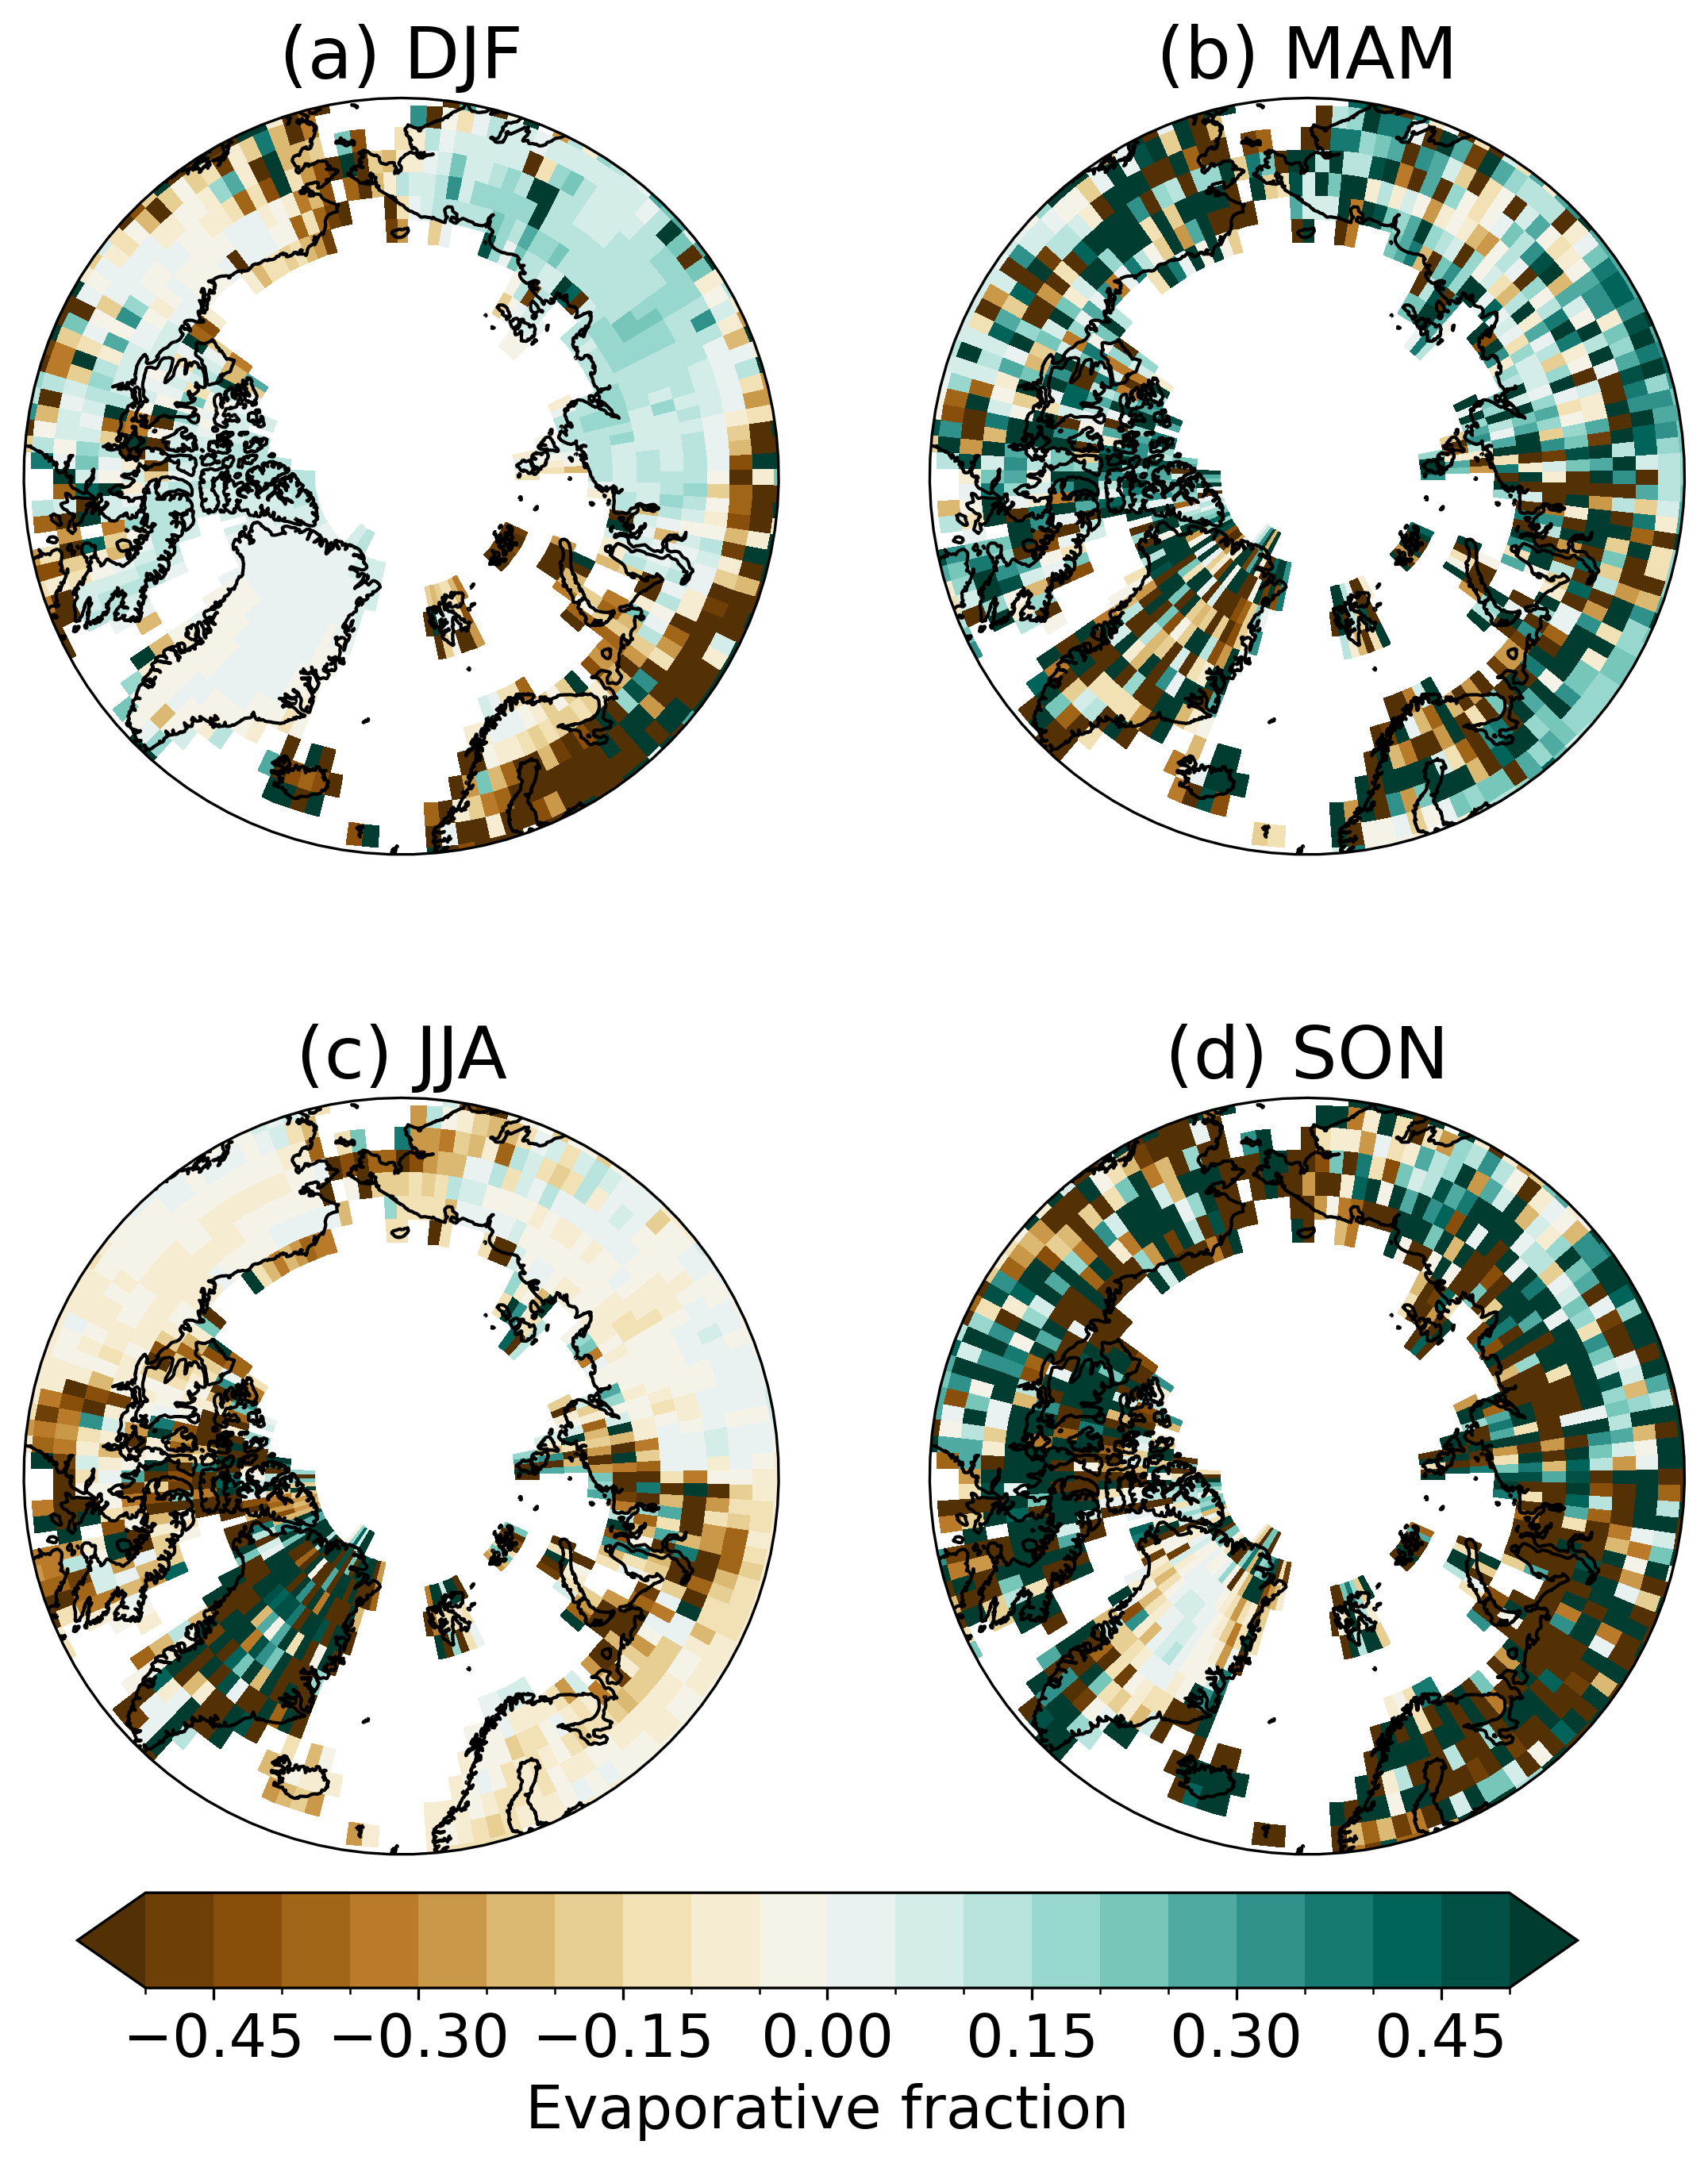

In [57]:
var = 'EF'
lim = 0.5
levels = np.linspace(-lim, lim, 21)
#levels=21
timeslice = slice('2040-01-01', '2069-12-31')

import cartopy.crs as ccrs
fig = plt.figure(1, figsize=[9,10],dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

piClim_s = ds_piClim.sel(time=timeslice).groupby('time.season').mean('time')
ds_s = ds_4xCO2.sel(time=timeslice).groupby('time.season').mean('time')

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):
    
    functions.polarCentral_set_latlim([60,90], ax)
    data = ds_s[var].sel(season=season) - piClim_s[var].sel(season=season)
    
    #data = data/piClim_s[var].sel(season=season)*100
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel('Fractional snow cover', fontsize=18)
cbar.ax.set_xlabel('Evaporative fraction', fontsize=18)
#cbar.ax.set_xlabel('Effective fractional snow cover', fontsize=18)

Text(0.5, 0, 'Soil moisture, kg/m2')

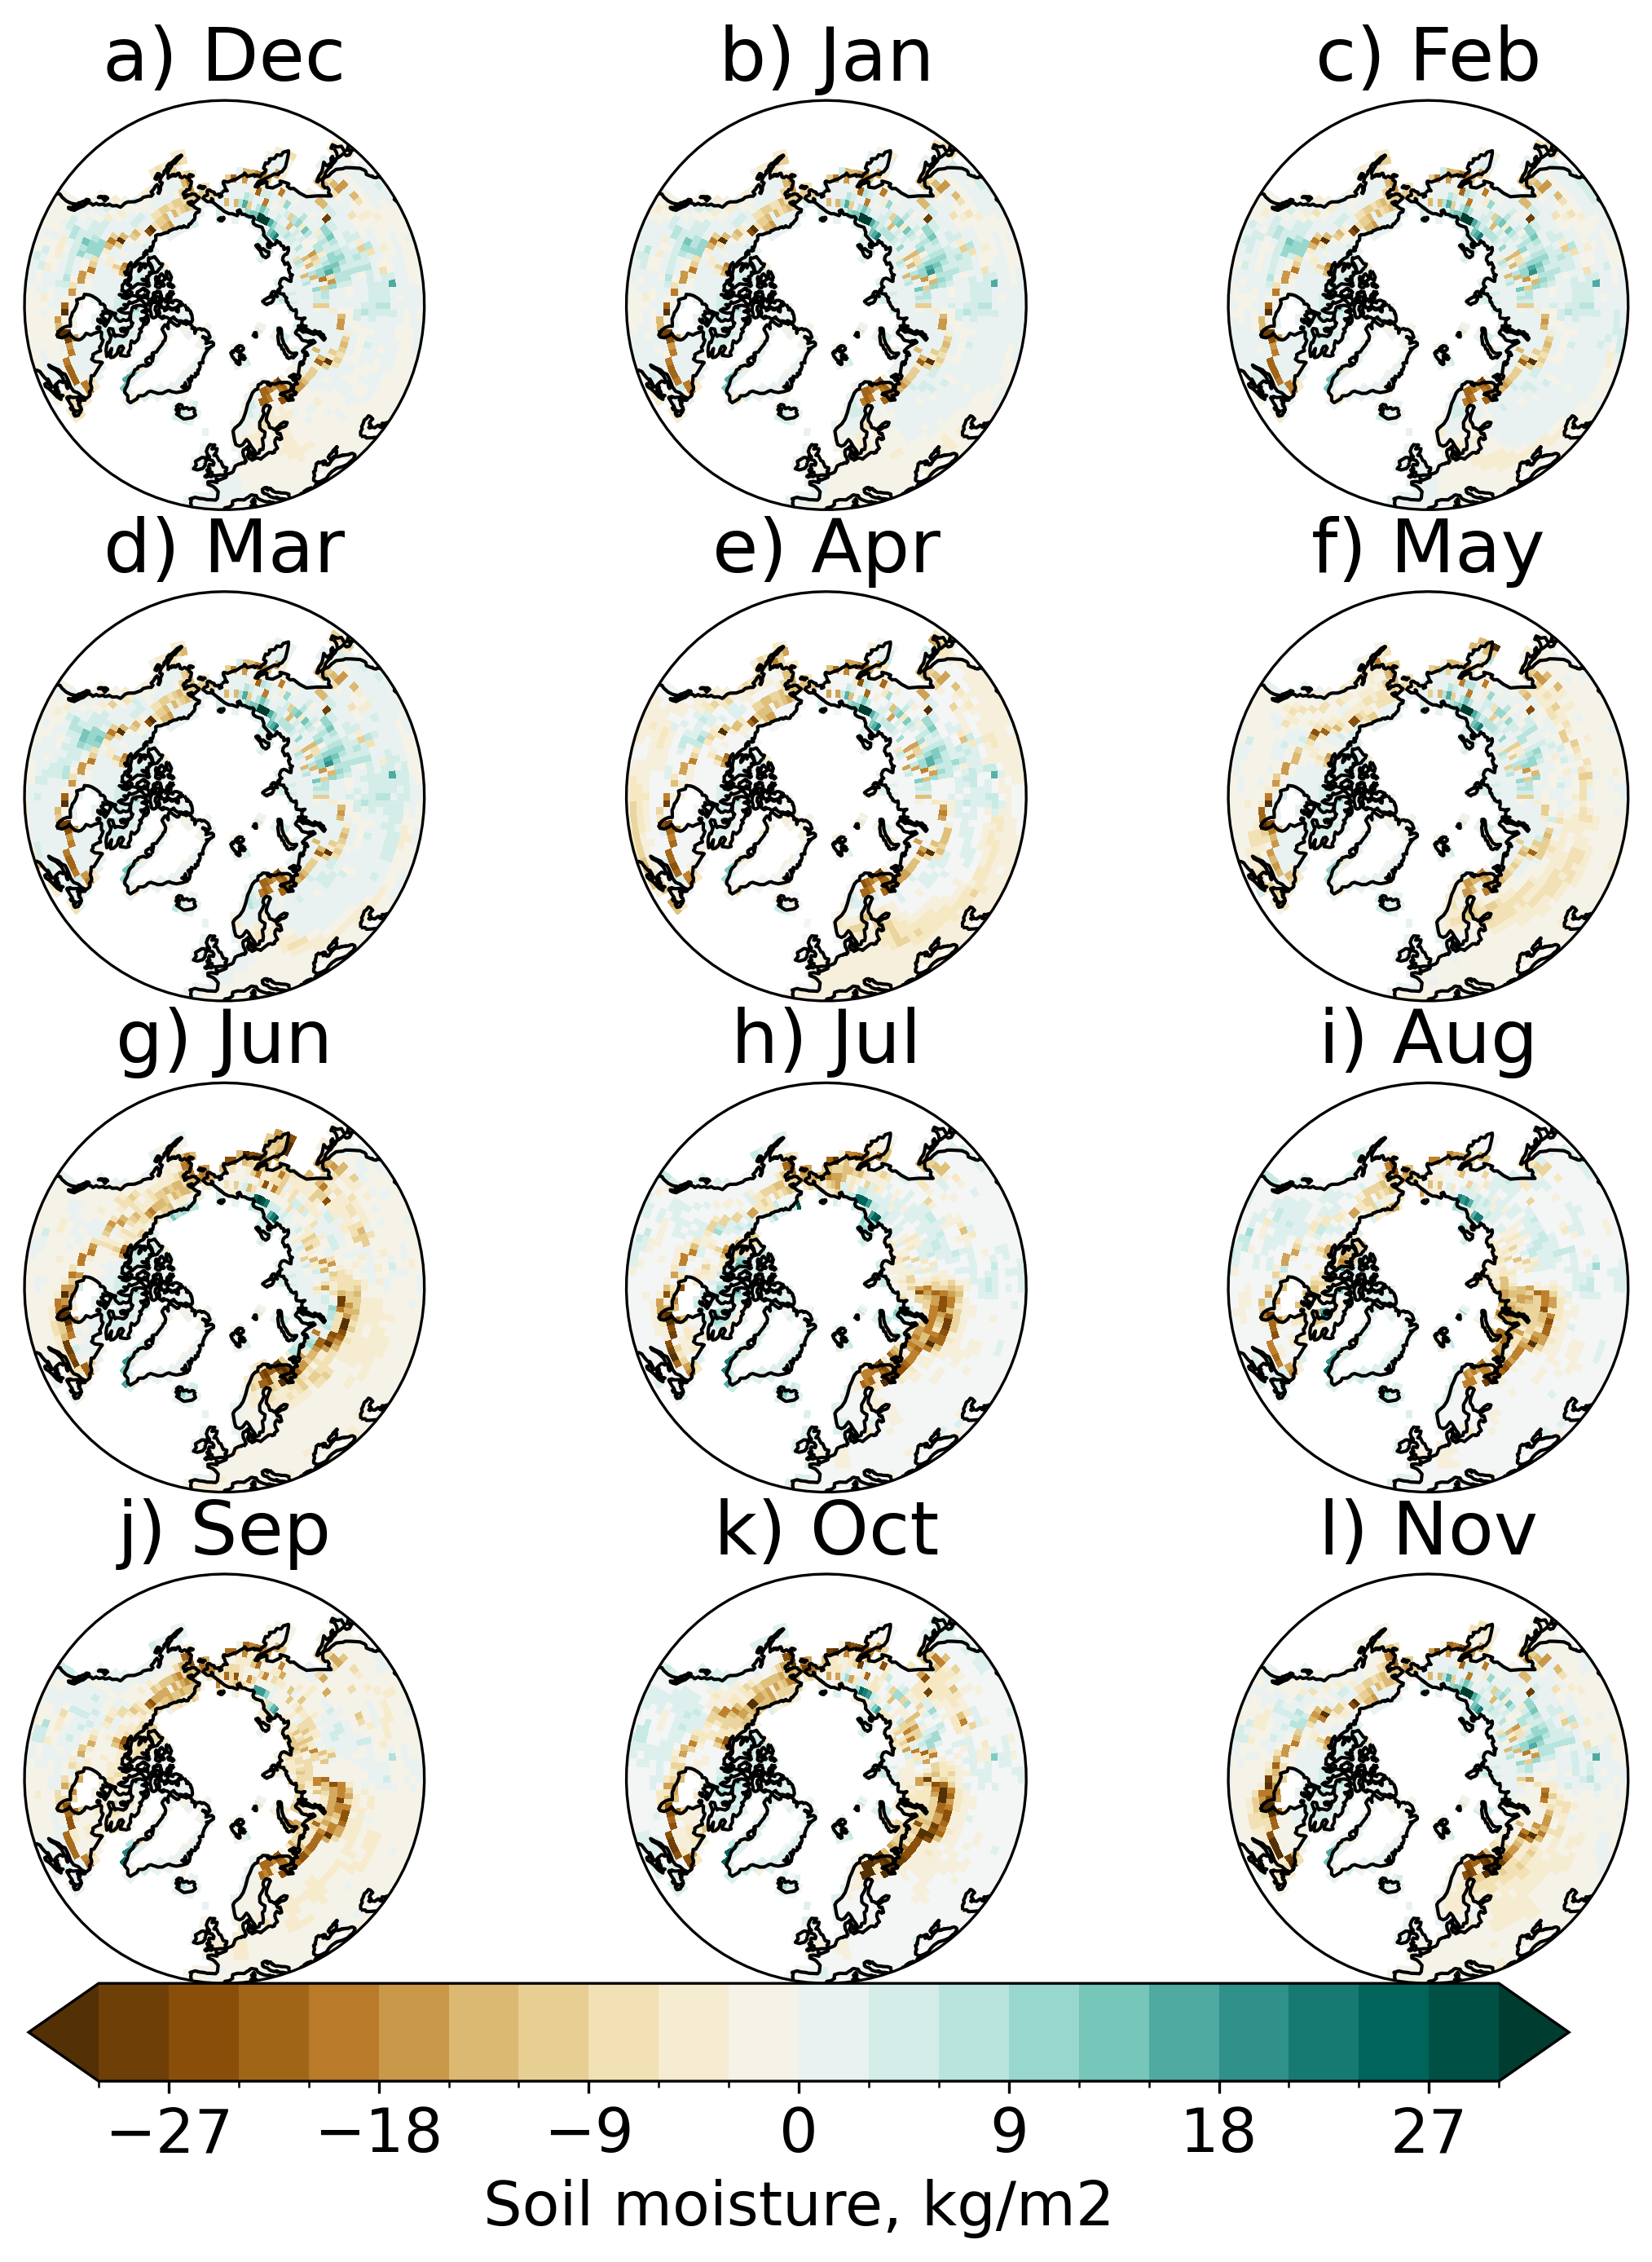

In [9]:
var = 'SOILWATER_10CM'
lim = 30
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

piClim_monthly = ds_piClim.sel(time=timeslice).groupby('time.month').mean('time')
ds_monthly = ds_2xCO2.sel(time=timeslice).groupby('time.month').mean('time')

# Set the projection to use for plotting
fig,axs = plt.subplots(nrows=4, ncols=3, figsize=[9,10],dpi=300,  subplot_kw={'projection':ccrs.Orthographic(0, 90)})

months = [[12, 1, 2], 
        [3, 4, 5], 
        [6, 7, 8], 
        [9, 10, 11]]

month_names = [['Dec', 'Jan', 'Feb'], 
        ['Mar', 'Apr', 'May'], 
        ['Jun', 'Jul', 'Aug'], 
        ['Sep', 'Oct', 'Nov']]

labels = [['a)', 'b)', 'c)'], 
        ['d)', 'e)', 'f)'], 
        ['g)', 'h)', 'i)'], 
        ['j)', 'k)', 'l)']]

for row in range(4):
    for col in range(3):
        ax = axs[row][col]
        month = months[row][col]
        piClim_i = piClim_monthly.sel(month=month)
        ds_i = ds_monthly.sel(month=month)

        functions.polarCentral_set_latlim([40,90], ax)
        data = ds_i[var] - piClim_i[var]
        #data = data/piClim_i[var]*100
        map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                                cmap='BrBG', levels=levels,
                                                add_colorbar=False)
        ax.set_title(labels[row][col]+' '+month_names[row][col], fontsize=22)        
        ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel('Soil moisture, kg/m2', fontsize=18)
#cbar.ax.set_xlabel('Soil moisture, %', fontsize=18)


Text(0.5, 0, 'mm/day')

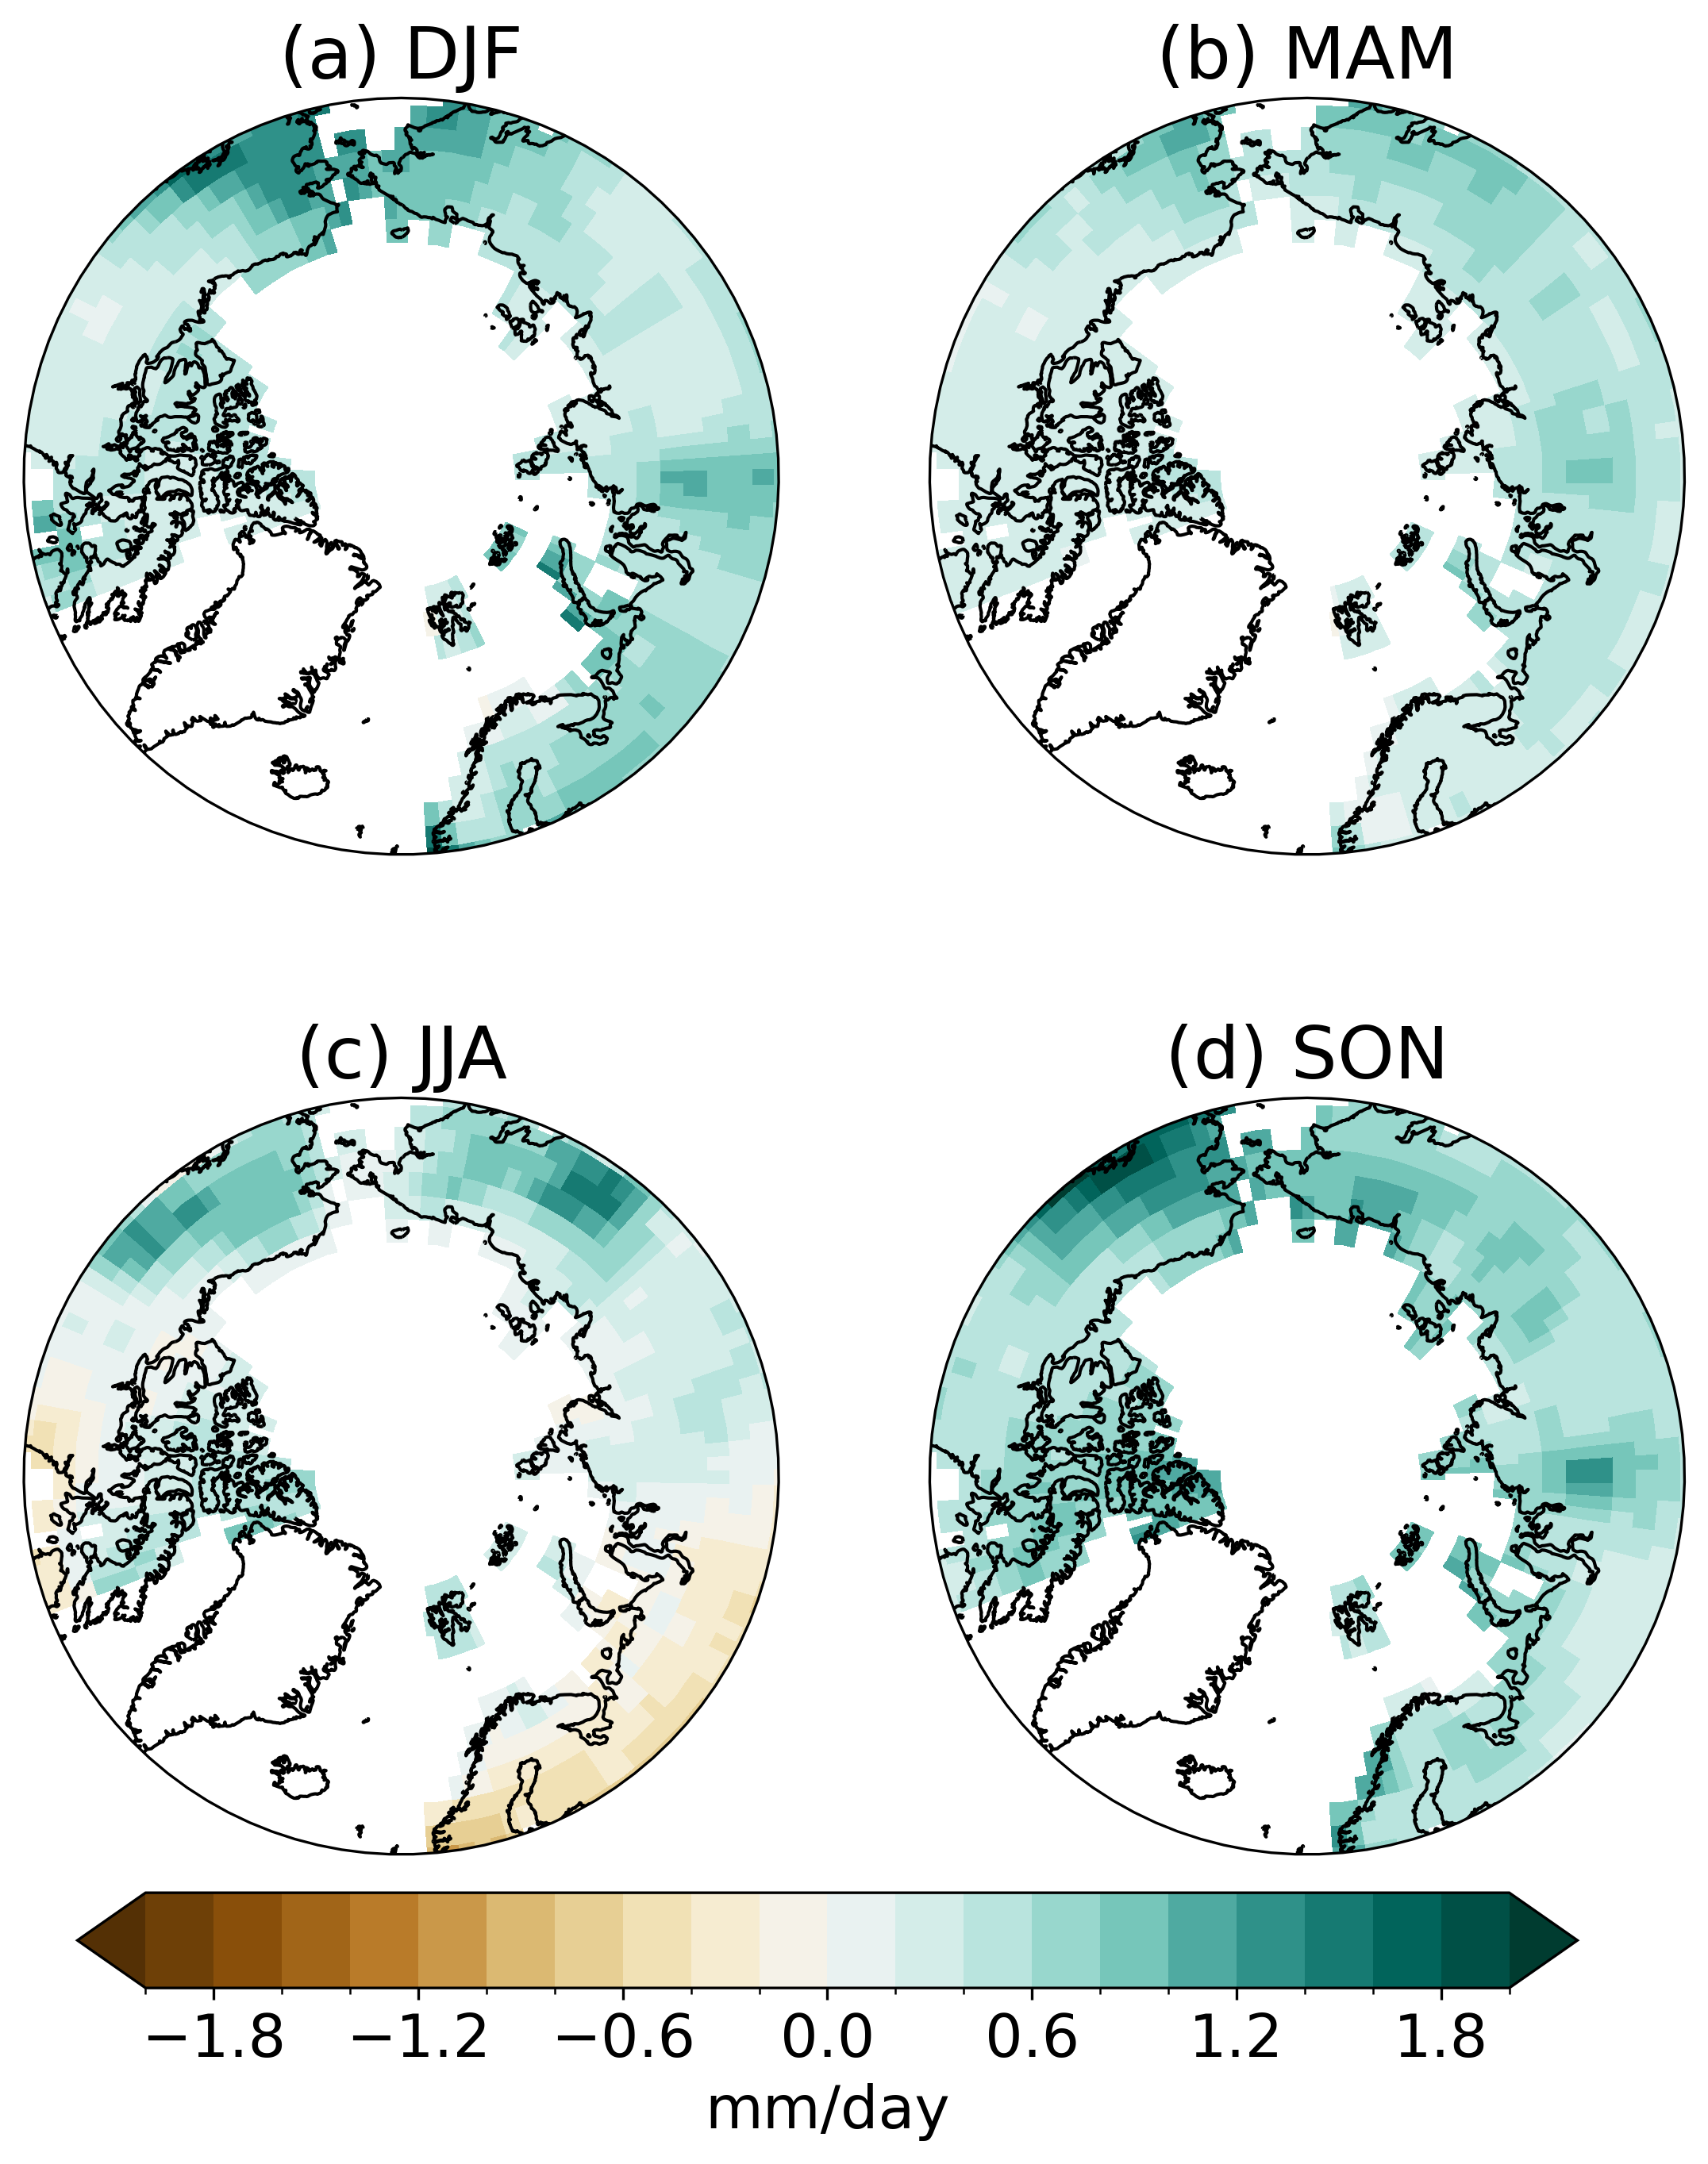

In [10]:
var = 'PRECIP_TOTAL'
lim = 2
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

import cartopy.crs as ccrs
fig = plt.figure(1, figsize=[9,10],dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

piClim_s = ds_piClim.sel(time=timeslice).groupby('time.season').mean('time')
ds_s = ds_4xCO2.sel(time=timeslice).groupby('time.season').mean('time')

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):
    
    functions.polarCentral_set_latlim([60,90], ax)
    data = ds_s[var].sel(season=season, lon=slice(0,290)) - piClim_s[var].sel(season=season, lon=slice(0,290))
    data = data * 60 * 60 * 24
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel('mm/day', fontsize=18)

Text(0.5, 0, 'mm/day')

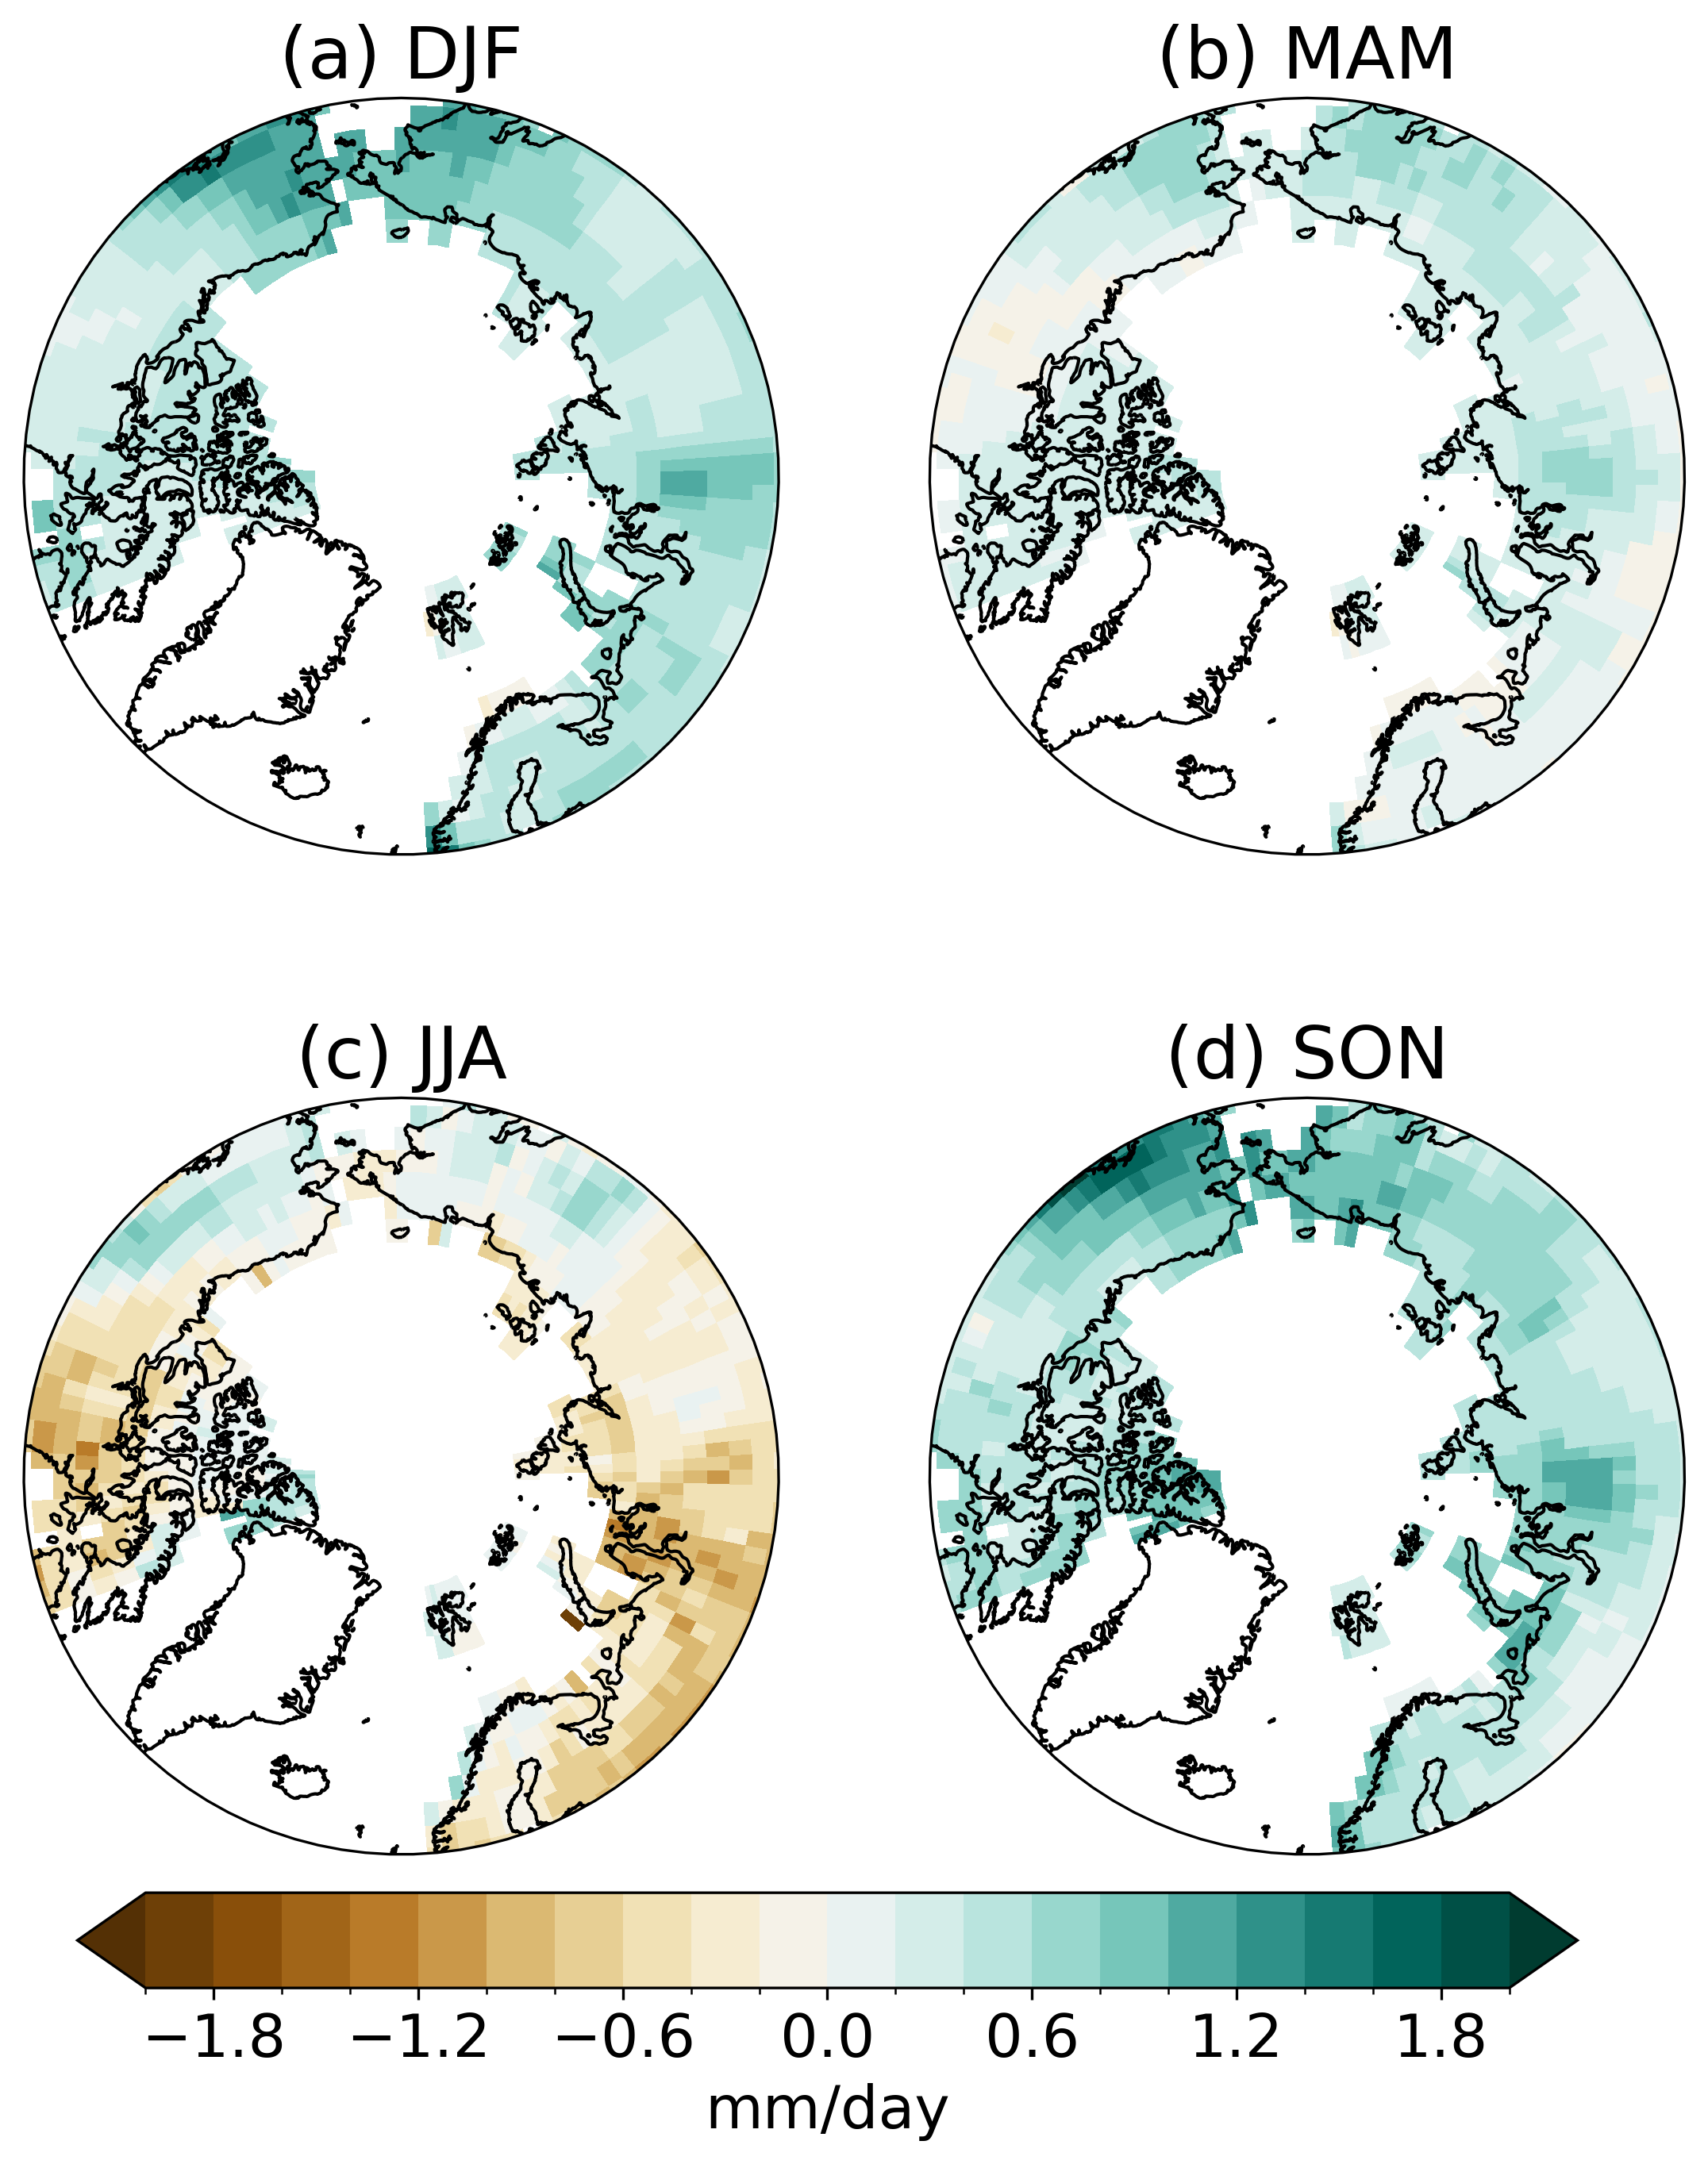

In [10]:
# Precipitation minus evapotranspiration
lim = 2
levels = np.linspace(-lim, lim, 21)
timeslice = slice('2040-01-01', '2069-12-31')

import cartopy.crs as ccrs
fig = plt.figure(1, figsize=[9,10],dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

piClim_s = ds_piClim.sel(time=timeslice).groupby('time.season').mean('time')
ds_s = ds_4xCO2.sel(time=timeslice).groupby('time.season').mean('time')

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):
    
    functions.polarCentral_set_latlim([60,90], ax)
    #data = ds_s['PRECIP_TOTAL'].sel(season=season) - ds_s['QFLX_EVAP_TOT'].sel(season=season) - ds_s['QRUNOFF'].sel(season=season)- (piClim_s['PRECIP_TOTAL'].sel(season=season) - piClim_s['QFLX_EVAP_TOT'].sel(season=season) - piClim_s['QRUNOFF'].sel(season=season))
    #data = ds_s['PRECIP_TOTAL'].sel(season=season) - ds_s['QFLX_EVAP_TOT'].sel(season=season) - ds_s['QH2OSFC'].sel(season=season)- (piClim_s['PRECIP_TOTAL'].sel(season=season) - piClim_s['QFLX_EVAP_TOT'].sel(season=season) - piClim_s['QH2OSFC'].sel(season=season))
    data = ds_s['PRECIP_TOTAL'].sel(season=season) - ds_s['QFLX_EVAP_TOT'].sel(season=season) - piClim_s['PRECIP_TOTAL'].sel(season=season) + piClim_s['QFLX_EVAP_TOT'].sel(season=season)
    #data = ds_s['QRUNOFF'].sel(season=season) - piClim_s['QRUNOFF'].sel(season=season)

    data = data.sel(lon=slice(0,290)) * 60 * 60 * 24
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel('mm/day', fontsize=18)

/tmp/ipykernel_2374740/2617884798.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


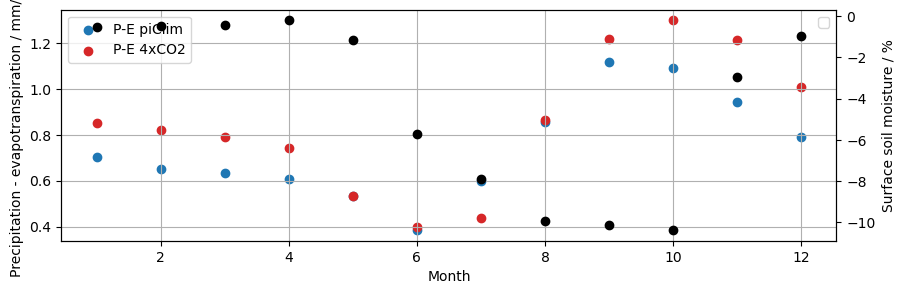

In [ ]:
# HYDROLOGICAL BALANCE

# Make a spatial average
Arctic_lim = 60
season = 'JJA'
tslice = slice('2040-01-01','2069-12-31')

# Choose area (NB! EXCLUDING GREENLAND!)
area_weights = ds_piClim['area'].sel(lat=slice(Arctic_lim,90))/ds_piClim['area'].sel(lat=slice(Arctic_lim,90)).sum()
ds_piClim_i = ds_piClim.sel(time=tslice,lat=slice(Arctic_lim,90), lon=slice(0,290))
ds_2xCO2_i = ds_2xCO2.sel(time=tslice,lat=slice(Arctic_lim,90), lon=slice(0,290))
ds_4xCO2_i = ds_4xCO2.sel(time=tslice,lat=slice(Arctic_lim,90), lon=slice(0,290))


# Monthly averages
ds_piClim_i = ds_piClim_i.groupby(ds_piClim_i.time.dt.month).mean('time')
ds_4xCO2_i = ds_4xCO2_i.groupby(ds_4xCO2_i.time.dt.month).mean('time')

fig,ax = plt.subplots(1, 1, figsize=(10,3))
for i in range(len(ds_piClim_i.month)):
    if i == 0:
        ax.scatter(1+i, ((ds_piClim_i['PRECIP_TOTAL'].isel(month=i) - ds_piClim_i['QFLX_EVAP_TOT'].isel(month=i))*area_weights).sum()*60*60*24, color='tab:blue',label='P-E piClim')
        ax.scatter(1+i, ((ds_4xCO2_i['PRECIP_TOTAL'].isel(month=i) - ds_4xCO2_i['QFLX_EVAP_TOT'].isel(month=i))*area_weights).sum()*60*60*24, color='tab:red',label='P-E 4xCO2')
    else:
        ax.scatter(1+i, ((ds_piClim_i['PRECIP_TOTAL'].isel(month=i) - ds_piClim_i['QFLX_EVAP_TOT'].isel(month=i))*area_weights).sum()*60*60*24, color='tab:blue')
        ax.scatter(1+i, ((ds_4xCO2_i['PRECIP_TOTAL'].isel(month=i) - ds_4xCO2_i['QFLX_EVAP_TOT'].isel(month=i))*area_weights).sum()*60*60*24, color='tab:red')

ax2 = ax.twinx()
for i in range(len(ds_piClim_i.month)):
    ax2.scatter(1+i, ((ds_4xCO2_i['SOILWATER_10CM'].isel(month=i) - ds_piClim_i['SOILWATER_10CM'].isel(month=i))*area_weights).sum()/((ds_piClim_i['SOILWATER_10CM'].isel(month=i)*area_weights).sum())*100, color='black')

ax.grid()
ax.set_xlabel('Month')
ax.set_ylabel('Precipitation - evapotranspiration / mm/day')
ax2.set_ylabel('Surface soil moisture / %')
ax.legend()
ax2.legend()
plt.show()